# Mobile Price Classification using Random Forest

In [8]:
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Reading the dataset
data_set = pd.read_csv("train.csv")
data_set.shape

(2000, 21)

In [10]:
# Splitting the input features and target variable in the dataset (last column is the target variable)
X = data_set.iloc[:, :-1]
y = data_set.iloc[:, -1]

In [11]:
# Define a range of number of estimators
n_estimators_range = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

## Without Normalization

In [12]:
# Splitting the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Criterion = Entropy

#### Determining the optimal number of estimators

In [13]:
accuracy_scores1 = []
precision_scores1 = []
recall_scores1 = []
f1_scores1 = []

In [14]:
for n_estimators in n_estimators_range:
    rf_classifier = RandomForestClassifier(criterion='entropy', n_estimators=n_estimators, random_state=42)
    
    accuracy_cv = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
    precision_cv = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='precision_macro')
    recall_cv = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='recall_macro')
    f1score_cv = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='f1_macro')
    
    accuracy_scores1.append(np.mean(accuracy_cv))
    precision_scores1.append(np.mean(precision_cv))
    recall_scores1.append(np.mean(recall_cv))
    f1_scores1.append(np.mean(f1score_cv))

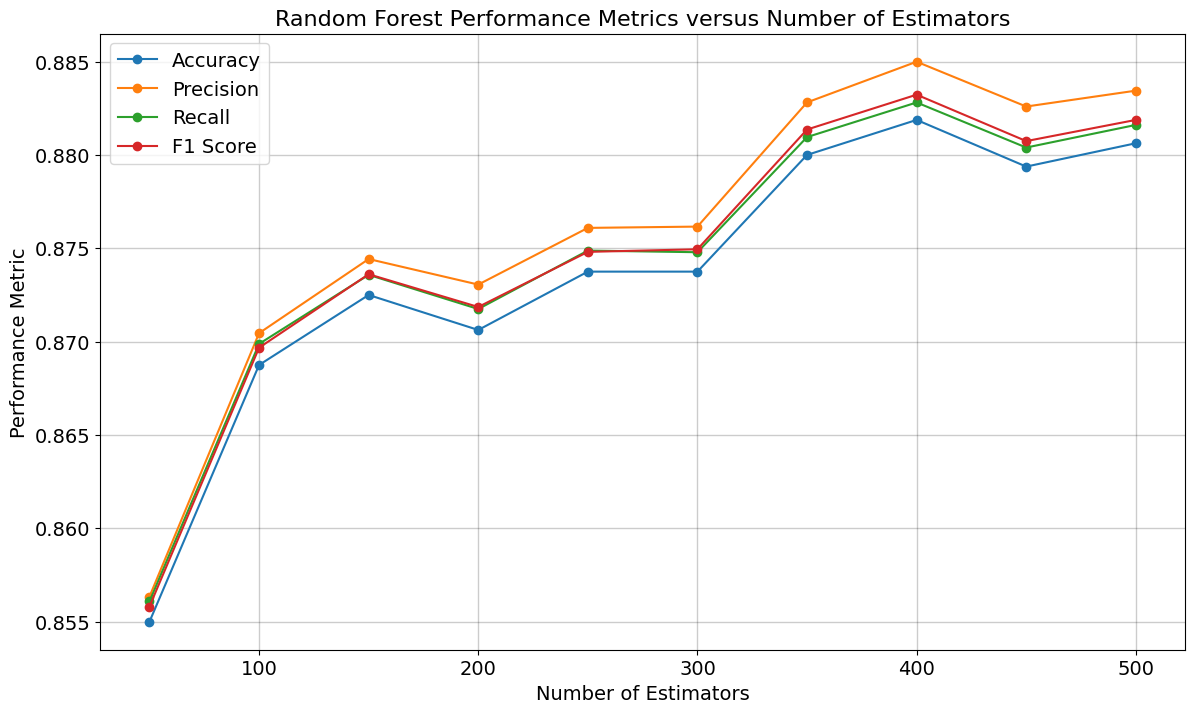

In [15]:
plt.figure(figsize=(14, 8))
plt.plot(n_estimators_range, accuracy_scores1, marker='o', label='Accuracy')
plt.plot(n_estimators_range, precision_scores1, marker='o', label='Precision')
plt.plot(n_estimators_range, recall_scores1, marker='o', label='Recall')
plt.plot(n_estimators_range, f1_scores1, marker='o', label='F1 Score')

plt.xlabel('Number of Estimators',color='black',fontsize=14)
plt.ylabel('Performance Metric',color='black',fontsize=14)
plt.title('Random Forest Performance Metrics versus Number of Estimators',color='black',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=1, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [16]:
best_n1_ind1 = accuracy_scores1.index(max(accuracy_scores1))
best_n2_ind1 = precision_scores1.index(max(precision_scores1))
best_n3_ind1 = recall_scores1.index(max(recall_scores1))
best_n4_ind1 = f1_scores1.index(max(f1_scores1))

best_n1 = n_estimators_range[max(best_n1_ind1,best_n2_ind1,best_n3_ind1,best_n4_ind1)]
best_n1

400

In [17]:
# Building the Random Forest
rf_classifier1 = RandomForestClassifier(criterion='entropy', n_estimators=best_n1, random_state=42)

In [18]:
# Cross-validation and its performance metrics
accuracy_cv1 = cross_val_score(rf_classifier1, X_train, y_train, cv=5, scoring='accuracy')
precision_cv1 = cross_val_score(rf_classifier1, X_train, y_train, cv=5, scoring='precision_macro')
recall_cv1 = cross_val_score(rf_classifier1, X_train, y_train, cv=5, scoring='recall_macro')
f1score_cv1 = cross_val_score(rf_classifier1, X_train, y_train, cv=5, scoring='f1_macro')

acc_cv1 = round(np.mean(accuracy_cv1)*100,3)
pre_cv1 = round(np.mean(precision_cv1)*100,3)
rec_cv1 = round(np.mean(recall_cv1)*100,3)
f1_cv1 = round(np.mean(f1score_cv1)*100,3)

print('Cross-Validation Accuracy (Without Normalization):',acc_cv1,'%')
print('Cross-Validation Precision (Without Normalization):',pre_cv1,'%')
print('Cross-Validation Recall (Without Normalization):',rec_cv1,'%')
print('Cross-Validation F1 Score (Without Normalization):',f1_cv1,'%')

Cross-Validation Accuracy (Without Normalization): 88.188 %
Cross-Validation Precision (Without Normalization): 88.499 %
Cross-Validation Recall (Without Normalization): 88.281 %
Cross-Validation F1 Score (Without Normalization): 88.323 %


In [19]:
# Making predictions on the test set
rf_classifier1.fit(X_train, y_train)
y_test_pred1 = rf_classifier1.predict(X_test)

In [20]:
# Evaluating the classifier on the test set
accuracy_test1 = accuracy_score(y_test, y_test_pred1)
precision_test1 = precision_score(y_test, y_test_pred1, average='macro')
recall_test1 = recall_score(y_test, y_test_pred1, average='macro')
f1score_test1 = f1_score(y_test, y_test_pred1, average='macro')

acc_tst1 = round(np.mean(accuracy_test1)*100,3)
pre_tst1 = round(np.mean(precision_test1)*100,3)
rec_tst1 = round(np.mean(recall_test1)*100,3)
f1_tst1 = round(np.mean(f1score_test1)*100,3)

print('Test Accuracy (Without Normalization):',acc_tst1,'%')
print('Test Precision (Without Normalization):',pre_tst1,'%')
print('Test Recall (Without Normalization):',rec_tst1,'%')
print('Test F1 Score (Without Normalization):',f1_tst1,'%')

Test Accuracy (Without Normalization): 90.0 %
Test Precision (Without Normalization): 89.633 %
Test Recall (Without Normalization): 89.633 %
Test F1 Score (Without Normalization): 89.633 %


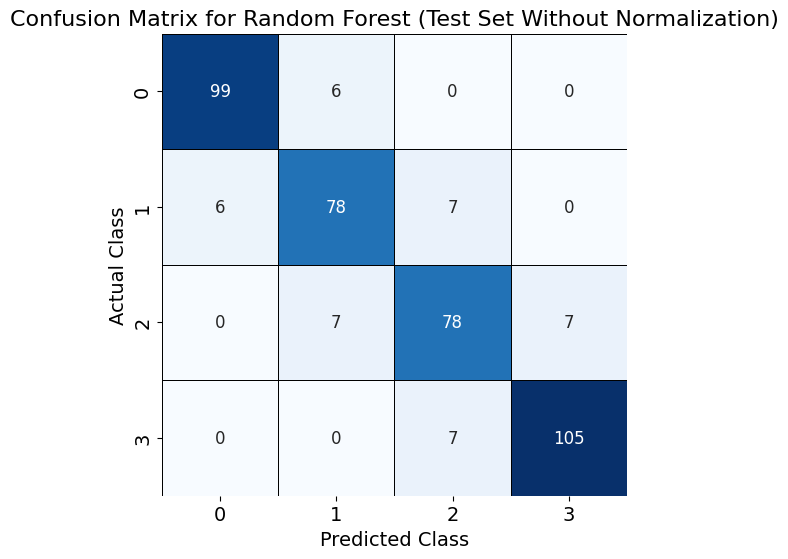

In [21]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test1 = confusion_matrix(y_test, y_test_pred1)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=rf_classifier1.classes_, yticklabels=rf_classifier1.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Random Forest (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

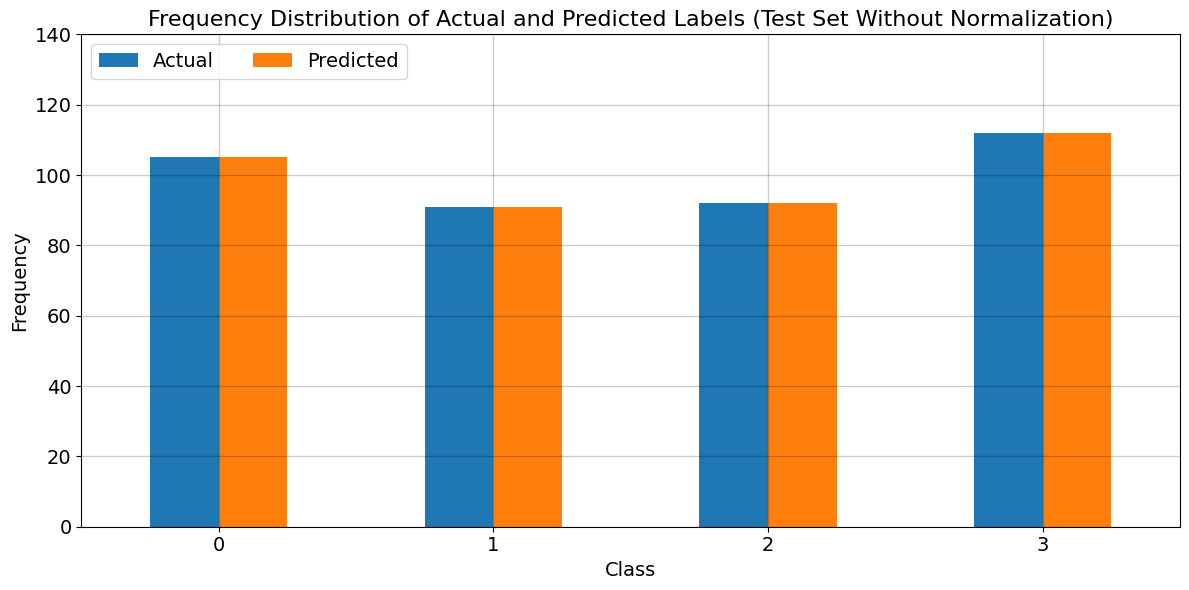

In [22]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test1, predicted_counts_test1 = np.unique(y_test_pred1, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test1, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set Without Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### Criterion = Gini Index

#### Determining the optimal number of estimators

In [23]:
accuracy_scores2 = []
precision_scores2 = []
recall_scores2 = []
f1_scores2 = []

In [24]:
for n_estimators in n_estimators_range:
    rf_classifier = RandomForestClassifier(criterion='gini', n_estimators=n_estimators, random_state=42)
    
    accuracy_cv = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
    precision_cv = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='precision_macro')
    recall_cv = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='recall_macro')
    f1score_cv = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='f1_macro')
    
    accuracy_scores2.append(np.mean(accuracy_cv))
    precision_scores2.append(np.mean(precision_cv))
    recall_scores2.append(np.mean(recall_cv))
    f1_scores2.append(np.mean(f1score_cv))

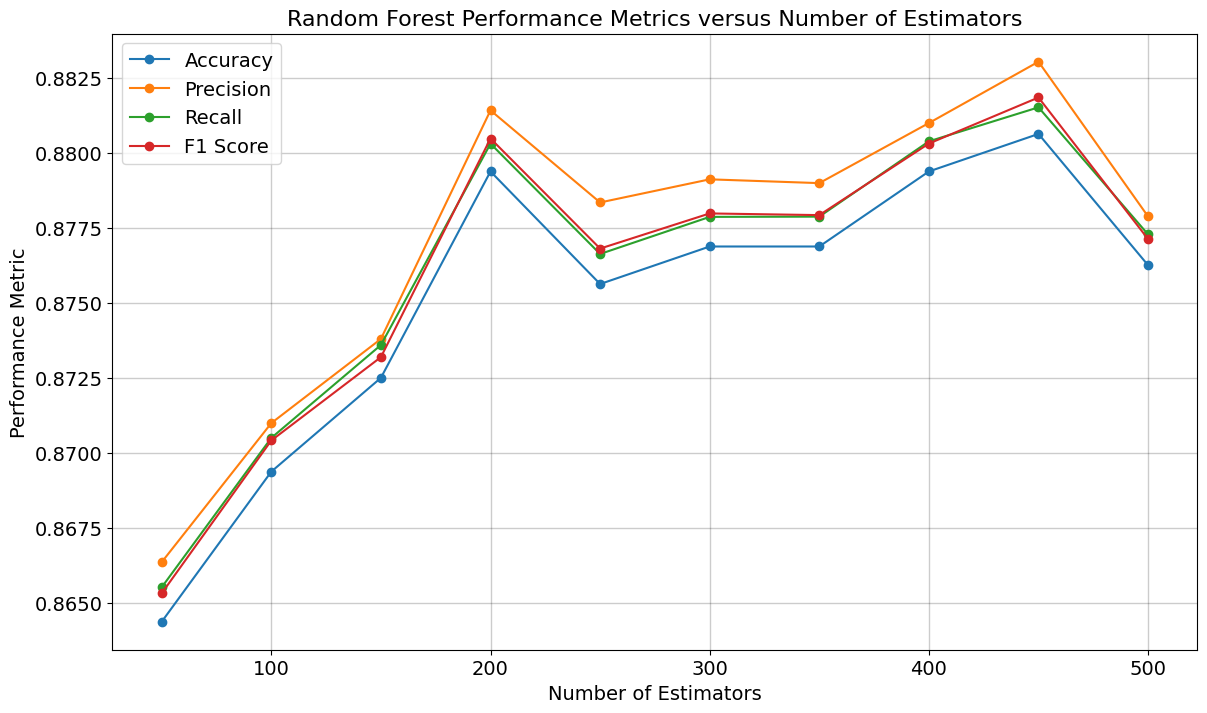

In [25]:
plt.figure(figsize=(14, 8))
plt.plot(n_estimators_range, accuracy_scores2, marker='o', label='Accuracy')
plt.plot(n_estimators_range, precision_scores2, marker='o', label='Precision')
plt.plot(n_estimators_range, recall_scores2, marker='o', label='Recall')
plt.plot(n_estimators_range, f1_scores2, marker='o', label='F1 Score')

plt.xlabel('Number of Estimators',color='black',fontsize=14)
plt.ylabel('Performance Metric',color='black',fontsize=14)
plt.title('Random Forest Performance Metrics versus Number of Estimators',color='black',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=1, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [26]:
best_n1_ind2 = accuracy_scores2.index(max(accuracy_scores2))
best_n2_ind2 = precision_scores2.index(max(precision_scores2))
best_n3_ind2 = recall_scores2.index(max(recall_scores2))
best_n4_ind2 = f1_scores2.index(max(f1_scores2))

best_n2 = n_estimators_range[max(best_n1_ind2,best_n2_ind2,best_n3_ind2,best_n4_ind2)]
best_n2

450

In [27]:
# Building the Random Forest
rf_classifier2 = RandomForestClassifier(criterion='gini', n_estimators=best_n2, random_state=42)

In [28]:
# Cross-validation and its performance metrics
accuracy_cv2 = cross_val_score(rf_classifier2, X_train, y_train, cv=5, scoring='accuracy')
precision_cv2 = cross_val_score(rf_classifier2, X_train, y_train, cv=5, scoring='precision_macro')
recall_cv2 = cross_val_score(rf_classifier2, X_train, y_train, cv=5, scoring='recall_macro')
f1score_cv2 = cross_val_score(rf_classifier2, X_train, y_train, cv=5, scoring='f1_macro')

acc_cv2 = round(np.mean(accuracy_cv2)*100,3)
pre_cv2 = round(np.mean(precision_cv2)*100,3)
rec_cv2 = round(np.mean(recall_cv2)*100,3)
f1_cv2 = round(np.mean(f1score_cv2)*100,3)

print('Cross-Validation Accuracy (Without Normalization):',acc_cv2,'%')
print('Cross-Validation Precision (Without Normalization):',pre_cv2,'%')
print('Cross-Validation Recall (Without Normalization):',rec_cv2,'%')
print('Cross-Validation F1 Score (Without Normalization):',f1_cv2,'%')

Cross-Validation Accuracy (Without Normalization): 88.062 %
Cross-Validation Precision (Without Normalization): 88.303 %
Cross-Validation Recall (Without Normalization): 88.151 %
Cross-Validation F1 Score (Without Normalization): 88.184 %


In [29]:
# Making predictions on the test set
rf_classifier2.fit(X_train, y_train)
y_test_pred2 = rf_classifier2.predict(X_test)

In [30]:
# Evaluating the classifier on the test set
accuracy_test2 = accuracy_score(y_test, y_test_pred2)
precision_test2 = precision_score(y_test, y_test_pred2, average='macro')
recall_test2 = recall_score(y_test, y_test_pred2, average='macro')
f1score_test2 = f1_score(y_test, y_test_pred2, average='macro')

acc_tst2 = round(np.mean(accuracy_test2)*100,3)
pre_tst2 = round(np.mean(precision_test2)*100,3)
rec_tst2 = round(np.mean(recall_test2)*100,3)
f1_tst2 = round(np.mean(f1score_test2)*100,3)

print('Test Accuracy (Without Normalization):',acc_tst2,'%')
print('Test Precision (Without Normalization):',pre_tst2,'%')
print('Test Recall (Without Normalization):',rec_tst2,'%')
print('Test F1 Score (Without Normalization):',f1_tst2,'%')

Test Accuracy (Without Normalization): 89.0 %
Test Precision (Without Normalization): 88.722 %
Test Recall (Without Normalization): 88.719 %
Test F1 Score (Without Normalization): 88.683 %


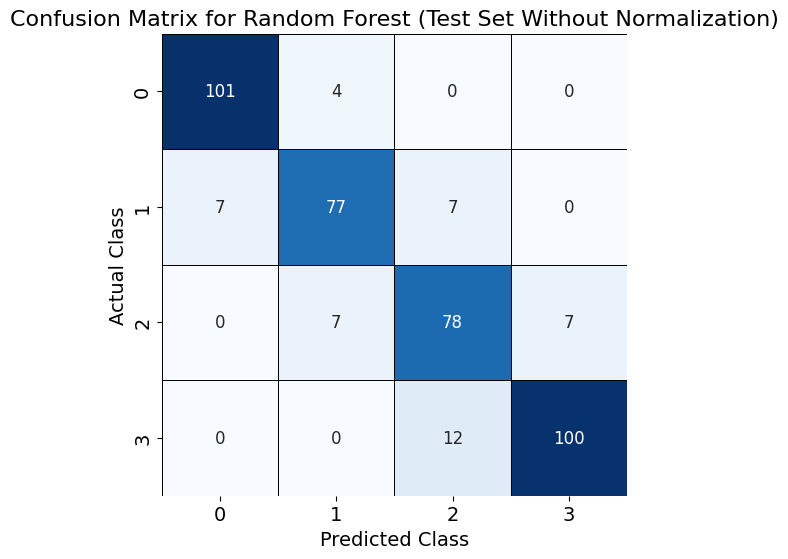

In [31]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test2 = confusion_matrix(y_test, y_test_pred2)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=rf_classifier2.classes_, yticklabels=rf_classifier2.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Random Forest (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

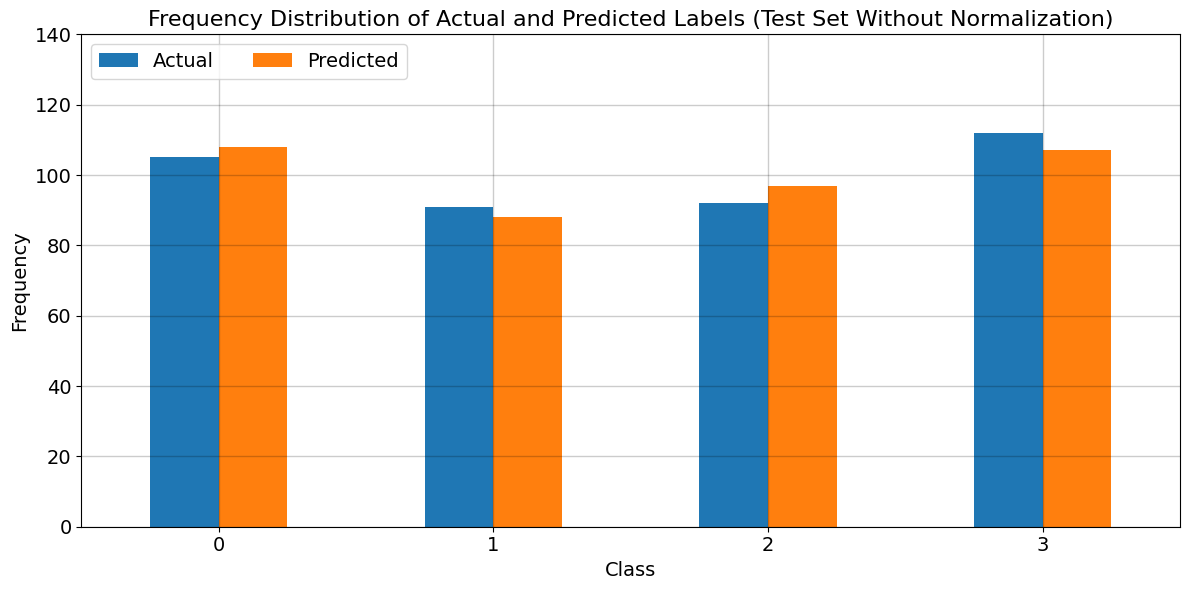

In [32]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test2, predicted_counts_test2 = np.unique(y_test_pred2, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test2, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set Without Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

## With Normalization

In [33]:
# Normalizing the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [34]:
# Splitting the dataset into training and testing subsets
X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

### Criterion = Entropy

#### Determining the optimal number of estimators

In [35]:
accuracy_scores3 = []
precision_scores3 = []
recall_scores3 = []
f1_scores3 = []

In [36]:
for n_estimators in n_estimators_range:
    rf_classifier = RandomForestClassifier(criterion='entropy', n_estimators=n_estimators, random_state=42)
    
    accuracy_cv = cross_val_score(rf_classifier, X_train_normalized, y_train, cv=5, scoring='accuracy')
    precision_cv = cross_val_score(rf_classifier, X_train_normalized, y_train, cv=5, scoring='precision_macro')
    recall_cv = cross_val_score(rf_classifier, X_train_normalized, y_train, cv=5, scoring='recall_macro')
    f1score_cv = cross_val_score(rf_classifier, X_train_normalized, y_train, cv=5, scoring='f1_macro')
    
    accuracy_scores3.append(np.mean(accuracy_cv))
    precision_scores3.append(np.mean(precision_cv))
    recall_scores3.append(np.mean(recall_cv))
    f1_scores3.append(np.mean(f1score_cv))

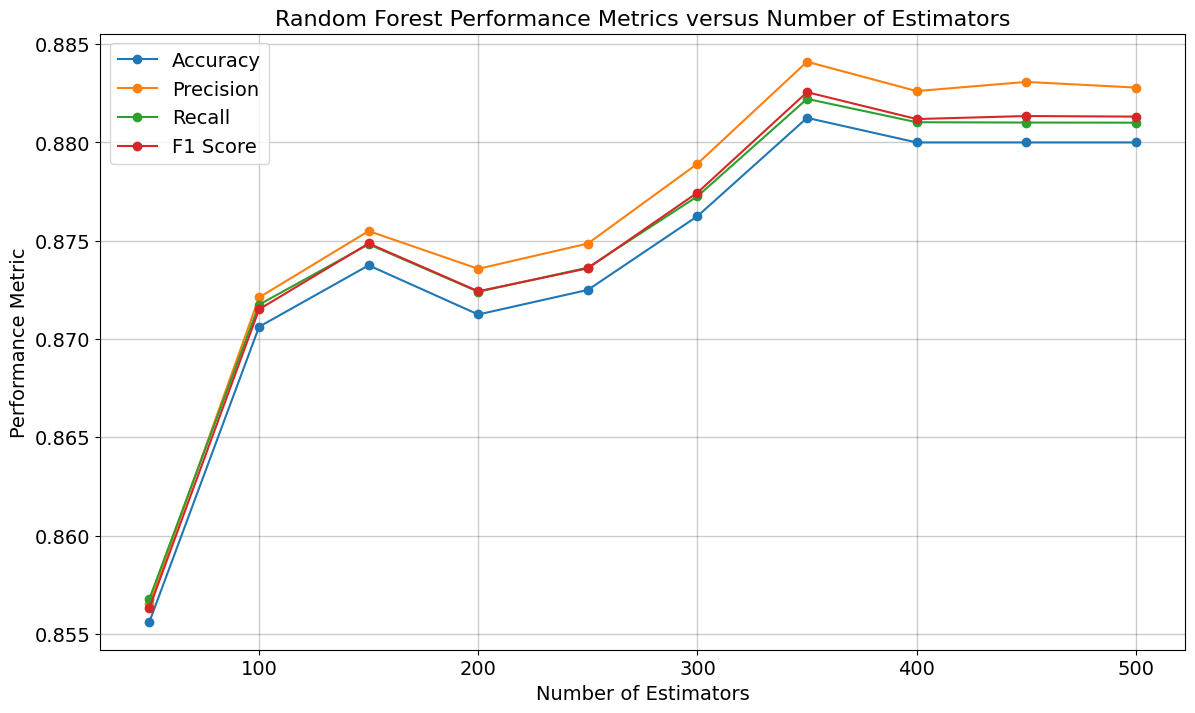

In [37]:
plt.figure(figsize=(14, 8))
plt.plot(n_estimators_range, accuracy_scores3, marker='o', label='Accuracy')
plt.plot(n_estimators_range, precision_scores3, marker='o', label='Precision')
plt.plot(n_estimators_range, recall_scores3, marker='o', label='Recall')
plt.plot(n_estimators_range, f1_scores3, marker='o', label='F1 Score')

plt.xlabel('Number of Estimators',color='black',fontsize=14)
plt.ylabel('Performance Metric',color='black',fontsize=14)
plt.title('Random Forest Performance Metrics versus Number of Estimators',color='black',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=1, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [38]:
best_n1_ind3 = accuracy_scores3.index(max(accuracy_scores3))
best_n2_ind3 = precision_scores3.index(max(precision_scores3))
best_n3_ind3 = recall_scores3.index(max(recall_scores3))
best_n4_ind3 = f1_scores3.index(max(f1_scores3))

best_n3 = n_estimators_range[max(best_n1_ind3,best_n2_ind3,best_n3_ind3,best_n4_ind3)]
best_n3

350

In [39]:
# Building the RandomForest
rf_classifier3 = RandomForestClassifier(criterion='entropy', n_estimators=best_n3, random_state=42)

In [40]:
# Cross-validation and its performance metrics
accuracy_cv3 = cross_val_score(rf_classifier3, X_train_normalized, y_train, cv=5, scoring='accuracy')
precision_cv3 = cross_val_score(rf_classifier3, X_train_normalized, y_train, cv=5, scoring='precision_macro')
recall_cv3 = cross_val_score(rf_classifier3, X_train_normalized, y_train, cv=5, scoring='recall_macro')
f1score_cv3 = cross_val_score(rf_classifier3, X_train_normalized, y_train, cv=5, scoring='f1_macro')

acc_cv3 = round(np.mean(accuracy_cv3)*100,3)
pre_cv3 = round(np.mean(precision_cv3)*100,3)
rec_cv3 = round(np.mean(recall_cv3)*100,3)
f1_cv3 = round(np.mean(f1score_cv3)*100,3)

print('Cross-Validation Accuracy (With Normalization):',acc_cv3,'%')
print('Cross-Validation Precision (With Normalization):',pre_cv3,'%')
print('Cross-Validation Recall (With Normalization):',rec_cv3,'%')
print('Cross-Validation F1 Score (With Normalization):',f1_cv3,'%')

Cross-Validation Accuracy (With Normalization): 88.125 %
Cross-Validation Precision (With Normalization): 88.411 %
Cross-Validation Recall (With Normalization): 88.222 %
Cross-Validation F1 Score (With Normalization): 88.256 %


In [41]:
# Making predictions on the test set
rf_classifier3.fit(X_train_normalized, y_train)
y_test_pred3 = rf_classifier3.predict(X_test_normalized)

In [42]:
# Evaluating the classifier on the test set
accuracy_test3 = accuracy_score(y_test, y_test_pred3)
precision_test3 = precision_score(y_test, y_test_pred3, average='macro')
recall_test3 = recall_score(y_test, y_test_pred3, average='macro')
f1score_test3 = f1_score(y_test, y_test_pred3, average='macro')

acc_tst3 = round(np.mean(accuracy_test3)*100,3)
pre_tst3 = round(np.mean(precision_test3)*100,3)
rec_tst3 = round(np.mean(recall_test3)*100,3)
f1_tst3 = round(np.mean(f1score_test3)*100,3)

print('Test Accuracy (With Normalization):',acc_tst3,'%')
print('Test Precision (With Normalization):',pre_tst3,'%')
print('Test Recall (With Normalization):',rec_tst3,'%')
print('Test F1 Score (With Normalization):',f1_tst3,'%')

Test Accuracy (With Normalization): 90.5 %
Test Precision (With Normalization): 90.17 %
Test Recall (With Normalization): 90.183 %
Test F1 Score (With Normalization): 90.172 %


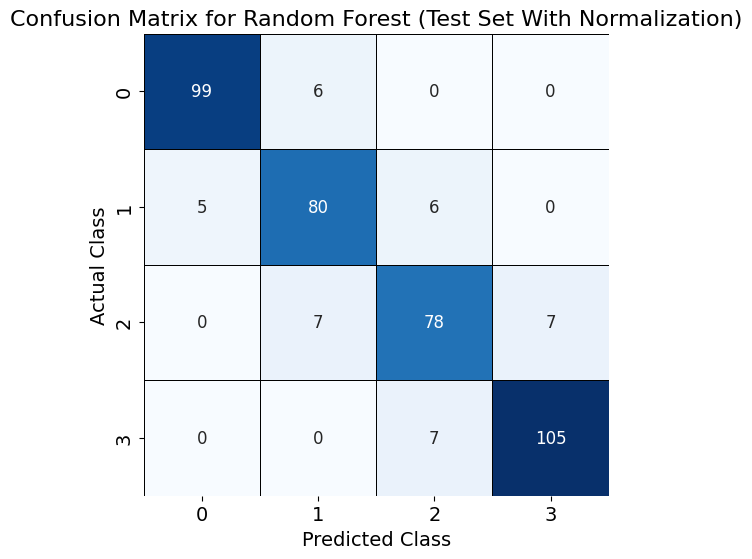

In [43]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test3 = confusion_matrix(y_test, y_test_pred3)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=rf_classifier3.classes_, yticklabels=rf_classifier3.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Random Forest (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

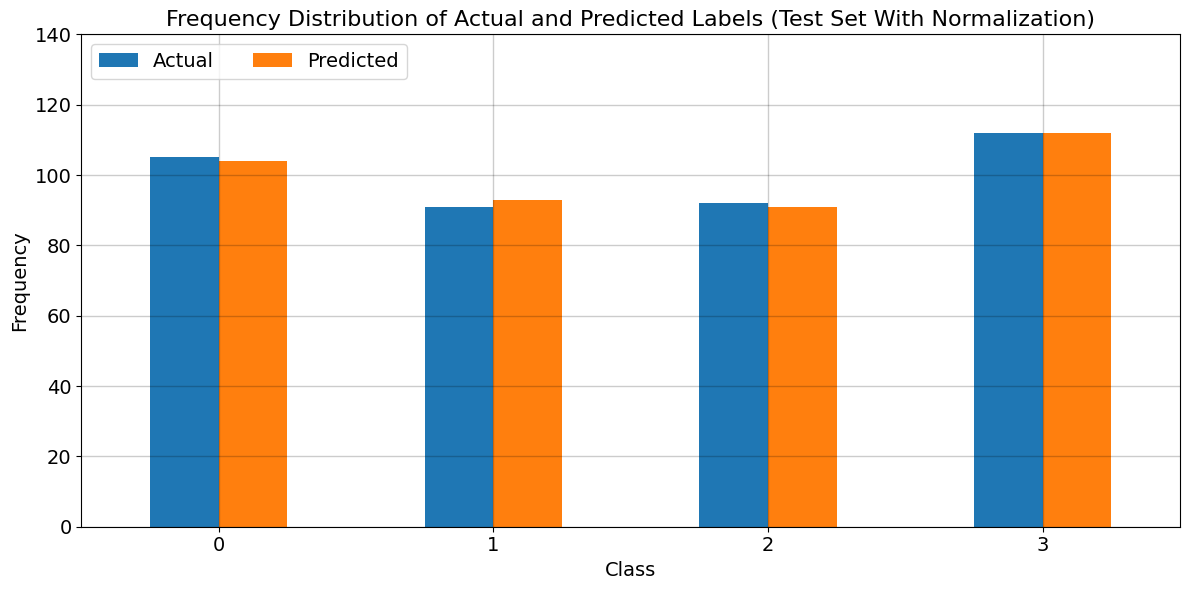

In [44]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test3, predicted_counts_test3 = np.unique(y_test_pred3, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test3, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set With Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### Criterion = Gini Index

#### Determining the optimal number of estimators

In [45]:
accuracy_scores4 = []
precision_scores4 = []
recall_scores4 = []
f1_scores4 = []

In [46]:
for n_estimators in n_estimators_range:
    rf_classifier = RandomForestClassifier(criterion='gini', n_estimators=n_estimators, random_state=42)
    
    accuracy_cv = cross_val_score(rf_classifier, X_train_normalized, y_train, cv=5, scoring='accuracy')
    precision_cv = cross_val_score(rf_classifier, X_train_normalized, y_train, cv=5, scoring='precision_macro')
    recall_cv = cross_val_score(rf_classifier, X_train_normalized, y_train, cv=5, scoring='recall_macro')
    f1score_cv = cross_val_score(rf_classifier, X_train_normalized, y_train, cv=5, scoring='f1_macro')
    
    accuracy_scores4.append(np.mean(accuracy_cv))
    precision_scores4.append(np.mean(precision_cv))
    recall_scores4.append(np.mean(recall_cv))
    f1_scores4.append(np.mean(f1score_cv))

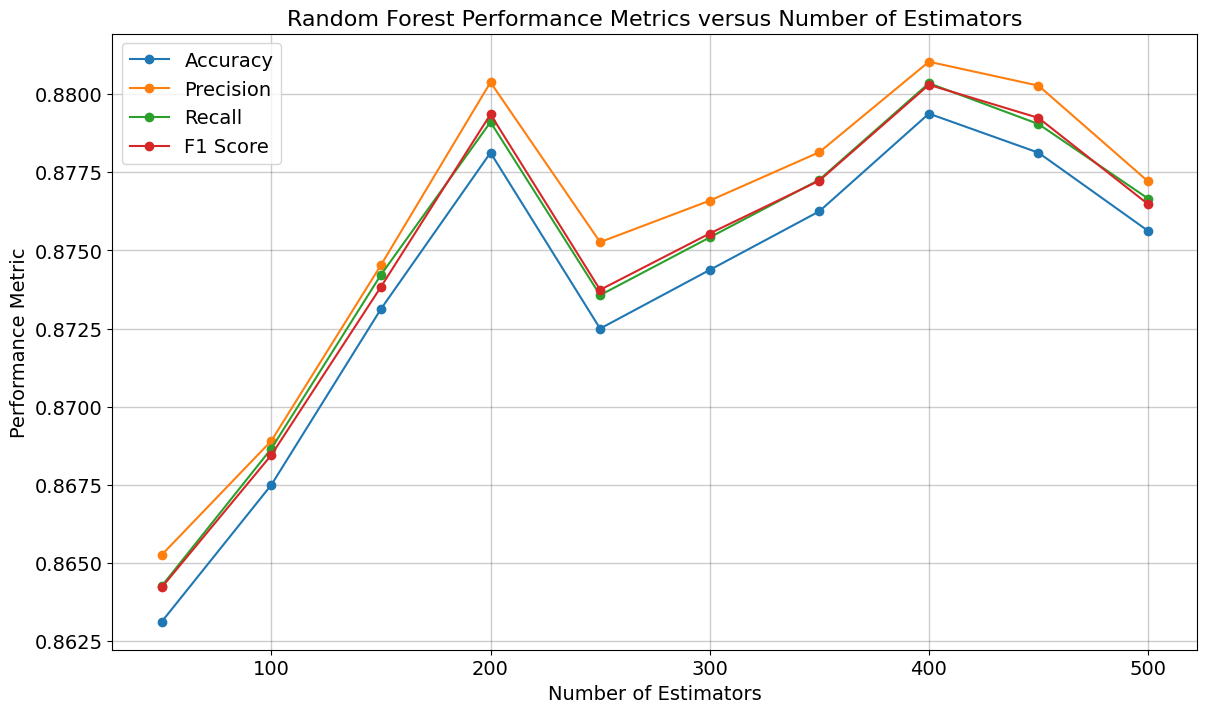

In [47]:
plt.figure(figsize=(14, 8))
plt.plot(n_estimators_range, accuracy_scores4, marker='o', label='Accuracy')
plt.plot(n_estimators_range, precision_scores4, marker='o', label='Precision')
plt.plot(n_estimators_range, recall_scores4, marker='o', label='Recall')
plt.plot(n_estimators_range, f1_scores4, marker='o', label='F1 Score')

plt.xlabel('Number of Estimators',color='black',fontsize=14)
plt.ylabel('Performance Metric',color='black',fontsize=14)
plt.title('Random Forest Performance Metrics versus Number of Estimators',color='black',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=1, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [48]:
best_n1_ind4 = accuracy_scores4.index(max(accuracy_scores4))
best_n2_ind4 = precision_scores4.index(max(precision_scores4))
best_n3_ind4 = recall_scores4.index(max(recall_scores4))
best_n4_ind4 = f1_scores4.index(max(f1_scores4))

best_n4 = n_estimators_range[max(best_n1_ind4,best_n2_ind4,best_n3_ind4,best_n4_ind4)]
best_n4

400

In [49]:
# Building the Decision Tree
rf_classifier4 = RandomForestClassifier(criterion='gini', n_estimators=best_n4, random_state=42)

In [50]:
# Cross-validation and its performance metrics
accuracy_cv4 = cross_val_score(rf_classifier4, X_train_normalized, y_train, cv=5, scoring='accuracy')
precision_cv4 = cross_val_score(rf_classifier4, X_train_normalized, y_train, cv=5, scoring='precision_macro')
recall_cv4 = cross_val_score(rf_classifier4, X_train_normalized, y_train, cv=5, scoring='recall_macro')
f1score_cv4 = cross_val_score(rf_classifier4, X_train_normalized, y_train, cv=5, scoring='f1_macro')

acc_cv4 = round(np.mean(accuracy_cv4)*100,3)
pre_cv4 = round(np.mean(precision_cv4)*100,3)
rec_cv4 = round(np.mean(recall_cv4)*100,3)
f1_cv4 = round(np.mean(f1score_cv4)*100,3)

print('Cross-Validation Accuracy (With Normalization):',acc_cv4,'%')
print('Cross-Validation Precision (With Normalization):',pre_cv4,'%')
print('Cross-Validation Recall (With Normalization):',rec_cv4,'%')
print('Cross-Validation F1 Score (With Normalization):',f1_cv4,'%')

Cross-Validation Accuracy (With Normalization): 87.937 %
Cross-Validation Precision (With Normalization): 88.103 %
Cross-Validation Recall (With Normalization): 88.035 %
Cross-Validation F1 Score (With Normalization): 88.03 %


In [51]:
# Making predictions on the test set
rf_classifier4.fit(X_train_normalized, y_train)
y_test_pred4 = rf_classifier4.predict(X_test_normalized)

In [52]:
# Evaluating the classifier on the test set
accuracy_test4 = accuracy_score(y_test, y_test_pred4)
precision_test4 = precision_score(y_test, y_test_pred4, average='macro')
recall_test4 = recall_score(y_test, y_test_pred4, average='macro')
f1score_test4 = f1_score(y_test, y_test_pred4, average='macro')

acc_tst4 = round(np.mean(accuracy_test4)*100,3)
pre_tst4 = round(np.mean(precision_test4)*100,3)
rec_tst4 = round(np.mean(recall_test4)*100,3)
f1_tst4 = round(np.mean(f1score_test4)*100,3)

print('Test Accuracy (With Normalization):',acc_tst4,'%')
print('Test Precision (With Normalization):',pre_tst4,'%')
print('Test Recall (With Normalization):',rec_tst4,'%')
print('Test F1 Score (With Normalization):',f1_tst4,'%')

Test Accuracy (With Normalization): 88.75 %
Test Precision (With Normalization): 88.447 %
Test Recall (With Normalization): 88.498 %
Test F1 Score (With Normalization): 88.441 %


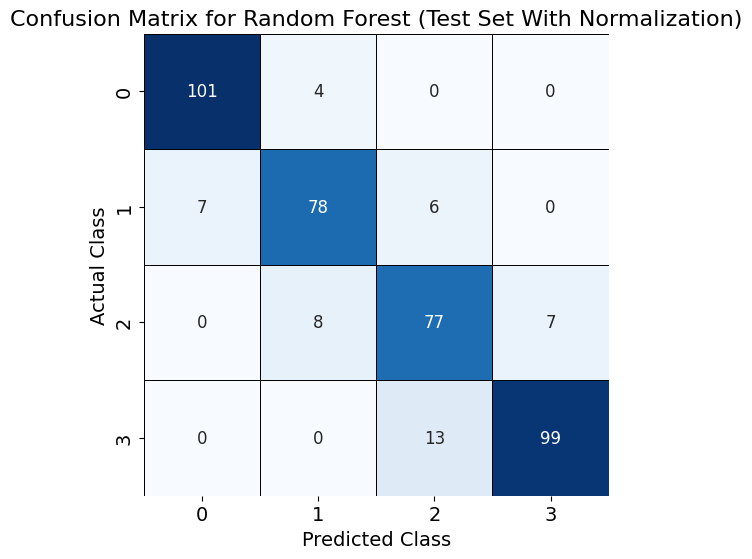

In [53]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test4 = confusion_matrix(y_test, y_test_pred4)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test4, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=rf_classifier4.classes_, yticklabels=rf_classifier4.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Random Forest (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

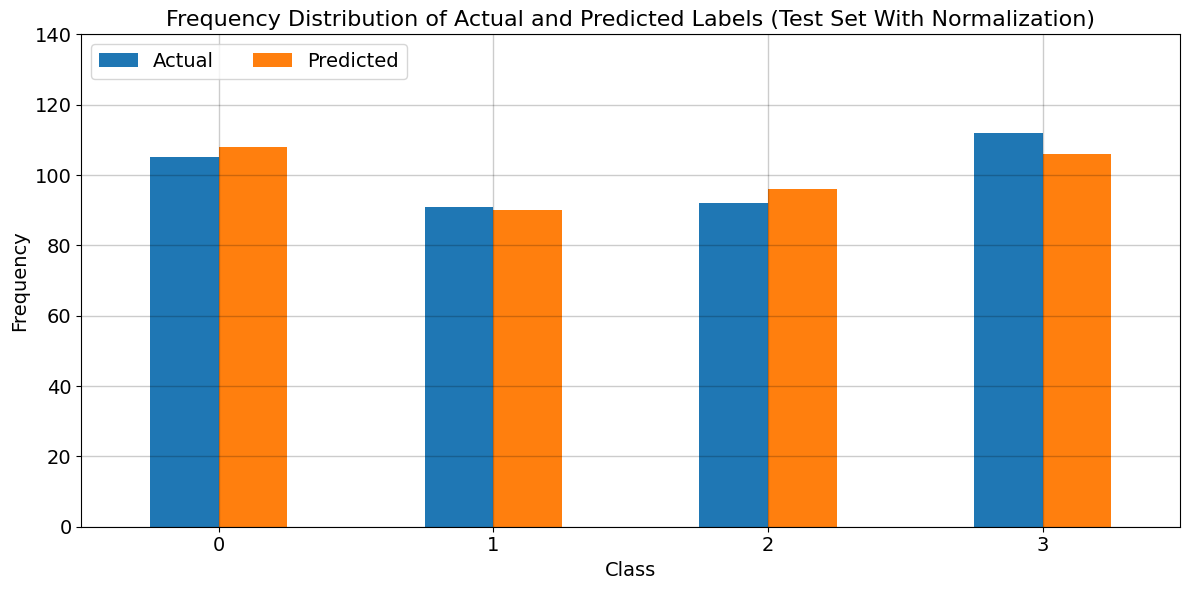

In [54]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test4, predicted_counts_test4 = np.unique(y_test_pred4, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test4, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set With Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

***